In [1]:
import pandas as pd
df = pd.read_csv("data.csv")
df["Price of the Car"] = df["Price of the Car"].str.replace(',', '').astype(int)
df["Kms Driven"] = df["Kms Driven"].str.replace(',','').astype(int)

In [2]:
df.head()

,Vehicle Name,Year of Model,Brand Name,Engine,Kms Driven,Variant,Transmission Type,Number of Photos Uploaded,Total Views,Price of the Car
0,2018 Maruti Ignis,2018,Maruti,1.2 Sigma BSIV,25330,Petrol,Manual,13,5195,440000
1,2015 Hyundai I20,2015,Hyundai,Sportz 1.4 CRDi,40522,Diesel,Manual,13,606,723000
2,2017 Hyundai Grand I10,2017,Hyundai,Sportz,65166,Petrol,Manual,13,5019,480000
3,2019 Renault Kwid,2019,Renault,RXT Optional,7759,Petrol,Manual,13,2025,440500
4,2017 Hyundai Grand I10,2017,Hyundai,1.2 Kappa Sportz BSIV,36234,Petrol,Manual,14,2870,495000


In [3]:
print(df["Brand Name"].unique())

['Maruti' 'Hyundai' 'Renault' 'Volkswagen' 'Mercedes-benz' 'Bmw' 'Audi'
 'Honda' 'Ford' 'Nissan' 'Toyota' 'Tata' 'Datsun']


In [4]:
df["Total Years Passed"] = 2021 - df["Year of Model"]
df.drop("Year of Model",axis = 1,inplace=True)
df.head()

,Vehicle Name,Brand Name,Engine,Kms Driven,Variant,Transmission Type,Number of Photos Uploaded,Total Views,Price of the Car,Total Years Passed
0,2018 Maruti Ignis,Maruti,1.2 Sigma BSIV,25330,Petrol,Manual,13,5195,440000,3
1,2015 Hyundai I20,Hyundai,Sportz 1.4 CRDi,40522,Diesel,Manual,13,606,723000,6
2,2017 Hyundai Grand I10,Hyundai,Sportz,65166,Petrol,Manual,13,5019,480000,4
3,2019 Renault Kwid,Renault,RXT Optional,7759,Petrol,Manual,13,2025,440500,2
4,2017 Hyundai Grand I10,Hyundai,1.2 Kappa Sportz BSIV,36234,Petrol,Manual,14,2870,495000,4


<AxesSubplot:>

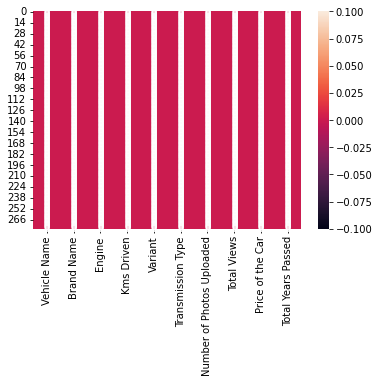

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),annot = True)

## Average Price Based on Car Model

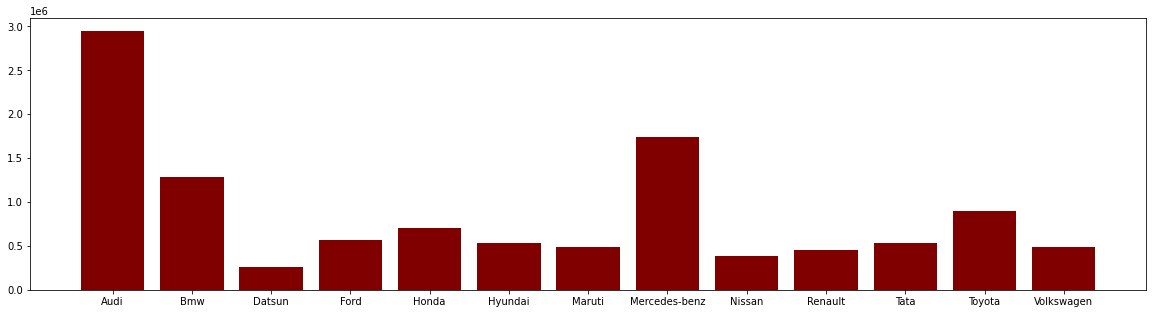

In [6]:
import matplotlib.pyplot as plt
data = df.groupby("Brand Name")["Price of the Car"].mean()
plt.figure(figsize=(20,5))
plt.bar(data.index, data.values, color ='maroon',
        width = 0.8)
plt.show()

## Car Brand Distribution

In [7]:
df["Brand Name"].value_counts()

Maruti           133
Hyundai           61
Honda             19
Ford              15
Renault           11
Volkswagen        11
Bmw               10
Mercedes-benz      5
Audi               5
Toyota             5
Nissan             1
Tata               1
Datsun             1
Name: Brand Name, dtype: int64

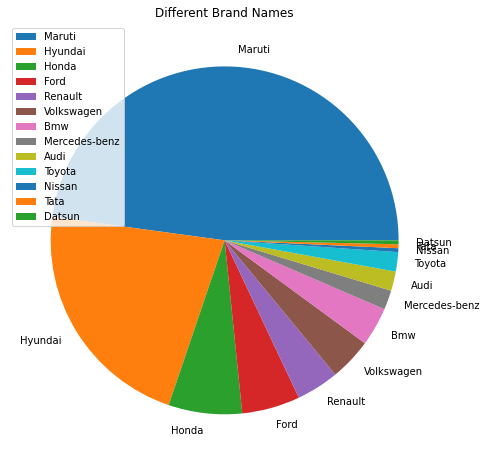

In [8]:
plt.figure(figsize=(8,8))
plt.pie(df["Brand Name"].value_counts().values,labels = df["Brand Name"].value_counts().index)
plt.legend(loc="upper left")
plt.title("Different Brand Names")
plt.show()

## Relation b/w various car brands

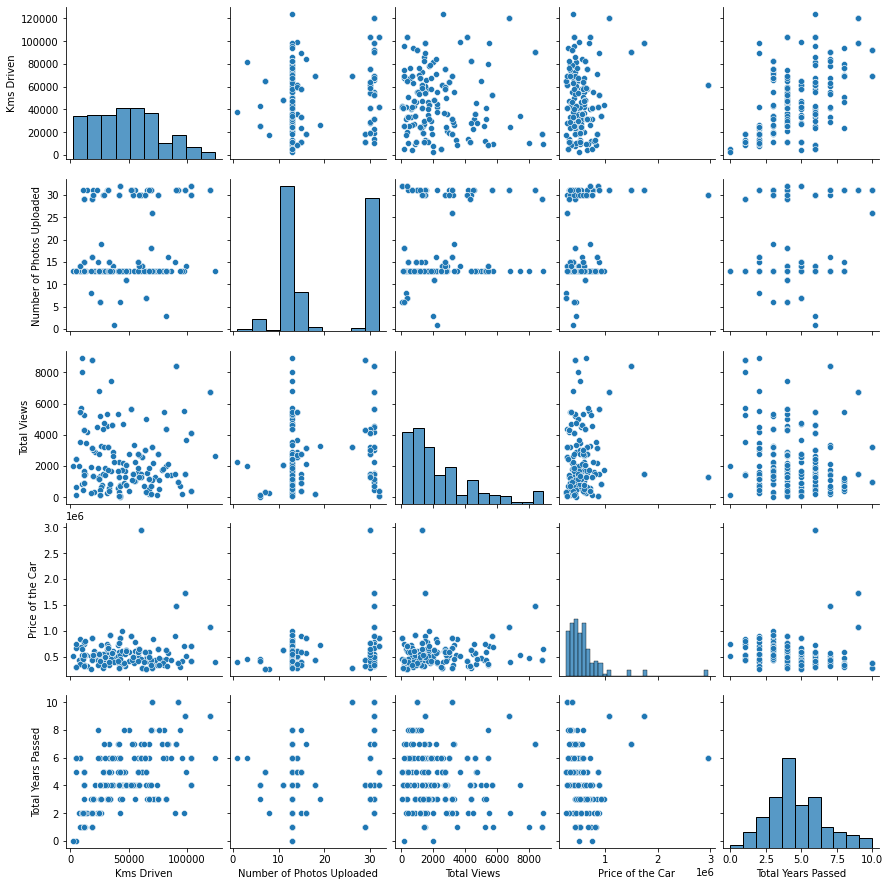

In [9]:
sns.pairplot(df[["Kms Driven","Number of Photos Uploaded","Total Views","Price of the Car","Total Years Passed"]])

c:\users\sanidhiya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price of the Car'>

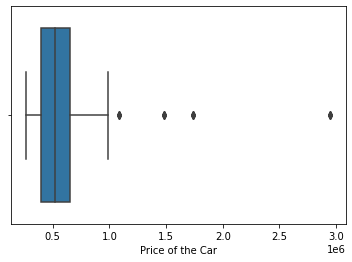

In [10]:
sns.boxplot(df["Price of the Car"])

c:\users\sanidhiya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms Driven'>

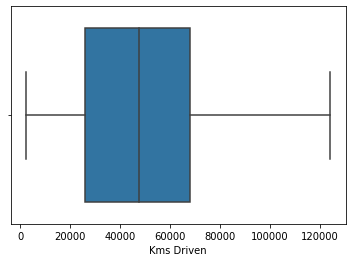

In [11]:
sns.boxplot(df["Kms Driven"])

## Note : Outliers aren't present

## Km Driven v/s Price of the car

<AxesSubplot:xlabel='Price of the Car', ylabel='Count'>

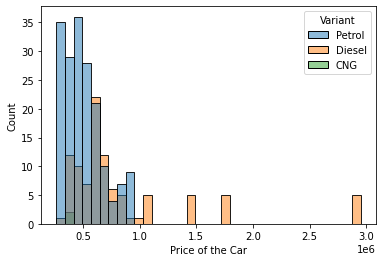

In [12]:
sns.histplot(data = df,x = "Price of the Car",hue="Variant")

<AxesSubplot:xlabel='Kms Driven', ylabel='Count'>

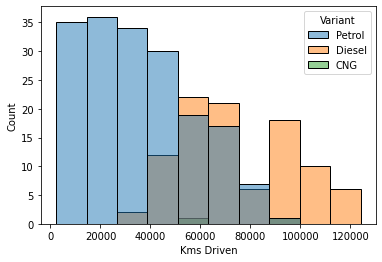

In [13]:
sns.histplot(data = df,x = "Kms Driven",hue="Variant")

<AxesSubplot:xlabel='Price of the Car', ylabel='Count'>

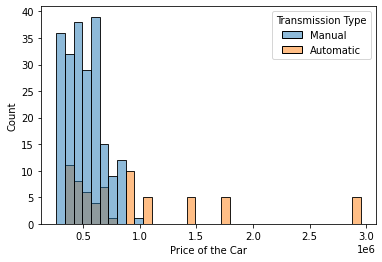

In [14]:
sns.histplot(data = df,x = "Price of the Car",hue="Transmission Type")

<AxesSubplot:xlabel='Kms Driven', ylabel='Count'>

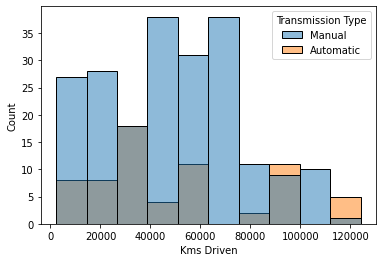

In [15]:
sns.histplot(data = df,x = "Kms Driven",hue="Transmission Type")

<AxesSubplot:>

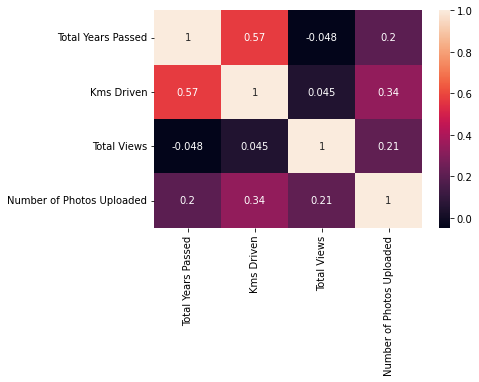

In [16]:
sns.heatmap(df[["Total Years Passed","Kms Driven","Total Views","Number of Photos Uploaded"]].corr(),annot=True)

## Conclusions : 
1. People mostly sell Maruti Cars.
2. Prices of Luxurious car brands like Audi, BMW , Mercedez is higher
3. Some People are trying to manipulate prices on websites based on number of views and number of photos provided.
4. Petrol Variant is cheaper than Diesel
5. Automatic Transmission is Costlier than Mannual Transmission Variant

In [17]:
df.columns

Index(['Vehicle Name', 'Brand Name', 'Engine', 'Kms Driven', 'Variant',
       'Transmission Type', 'Number of Photos Uploaded', 'Total Views',
       'Price of the Car', 'Total Years Passed'],
      dtype='object')

### Useless Columns : Vehicle Name, Engine

In [18]:
df.drop(['Vehicle Name','Engine'],axis = 1,inplace=True)

## No Preprocessing

In [19]:


from pycaret.datasets import get_data
from pycaret.regression import *

setup(df, target='Price of the Car', silent=True)
cm = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,57989.6316,8106947672.9121,88792.3317,0.9368,0.1717,0.1154,0.0970
gbr,Gradient Boosting Regressor,66323.4449,8513541776.3991,89303.1301,0.9356,0.1772,0.1349,0.0300
et,Extra Trees Regressor,43851.5468,7636123957.2911,85097.1919,0.9280,0.1677,0.0911,0.0870
llar,Lasso Least Angle Regression,72980.5773,10552362775.2790,101644.7005,0.9025,0.2111,0.1557,0.0110
lasso,Lasso Regression,73373.4062,10702582415.1987,102255.8986,0.9010,0.2123,0.1567,0.0100
dt,Decision Tree Regressor,62810.8947,15387220031.5790,121566.3678,0.8738,0.2374,0.1327,0.0090
lr,Linear Regression,75926.8617,13899239571.3091,111419.4943,0.8674,0.2271,0.1663,0.6020
ridge,Ridge Regression,116549.3150,22035302321.3637,147621.0264,0.8051,0.2689,0.2200,0.0080
ada,AdaBoost Regressor,126783.9038,25110501826.3425,157164.8671,0.8017,0.3064,0.2703,0.0140
lightgbm,Light Gradient Boosting Machine,126284.8029,32514102963.2737,171676.9991,0.7978,0.2601,0.2224,0.0160


## With Normalization 

In [21]:


from pycaret.datasets import get_data
from pycaret.regression import *

setup(df, target='Price of the Car', silent=True,normalize=True,normalize_method='zscore')
cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,67435.7826,17759396011.8853,114133.7980,0.8421,0.1741,0.1146,0.1030
gbr,Gradient Boosting Regressor,72056.4138,10793759445.7375,102151.5566,0.8128,0.1963,0.1429,0.0290
dt,Decision Tree Regressor,50657.2632,11518889589.4737,104111.6831,0.8014,0.2011,0.1041,0.0090
et,Extra Trees Regressor,45594.8434,9511747459.2071,95100.7174,0.7790,0.1776,0.0926,0.0940
llar,Lasso Least Angle Regression,85145.4119,15735366312.6429,122326.0219,0.6846,0.2607,0.1760,0.0100
lasso,Lasso Regression,85759.3360,16039876387.4732,123262.1256,0.6774,0.2623,0.1775,0.0100
lightgbm,Light Gradient Boosting Machine,129325.0770,47820127600.5579,193634.1887,0.6415,0.2746,0.2200,0.0130
ada,AdaBoost Regressor,129949.4384,25655091684.1780,157440.1143,0.6155,0.3037,0.2745,0.0170
lr,Linear Regression,91289.5231,21041209239.9634,136049.7339,0.5563,0.2772,0.1927,0.0160
ridge,Ridge Regression,130739.4382,37092953739.0020,181667.6849,0.5414,0.2940,0.2340,0.0070


## With PCA

In [22]:
from pycaret.datasets import get_data
from pycaret.regression import *

setup(df, target='Price of the Car', silent=True,pca=True)
cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,77639.0350,47013901441.5976,175035.0718,-0.0193,0.2568,0.1621,0.0850
lightgbm,Light Gradient Boosting Machine,215091.5160,111286297659.4050,319906.4197,-0.1529,0.3964,0.3694,0.0120
br,Bayesian Ridge,263571.9780,212151337643.3246,415725.9437,-0.2453,0.4862,0.4324,0.0060
llar,Lasso Least Angle Regression,264350.7890,211944657213.9673,416504.1894,-0.2659,0.4870,0.4342,0.0070
lr,Linear Regression,264352.2373,211944596066.6448,416505.5166,-0.2660,0.4870,0.4342,0.0160
lasso,Lasso Regression,264352.2373,211944596066.8170,416505.5166,-0.2660,0.4870,0.4342,0.0070
ridge,Ridge Regression,264352.2373,211944596066.6262,416505.5166,-0.2660,0.4870,0.4342,0.0070
en,Elastic Net,264352.2373,211944596065.1384,416505.5165,-0.2660,0.4870,0.4342,0.0070
lar,Least Angle Regression,264352.2373,211944596066.6448,416505.5166,-0.2660,0.4870,0.4342,0.0170
omp,Orthogonal Matching Pursuit,264352.2373,211944596066.6448,416505.5166,-0.2660,0.4870,0.4342,0.0070


## With Transformation

In [24]:
setup(df, target='Price of the Car', transformation_method = 'yeo-johnson',transformation=True, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,63958.7766,12122885571.0876,101039.5049,0.7730,0.1762,0.1222,0.1010
lasso,Lasso Regression,78047.4738,12245378202.0159,108257.1500,0.7434,0.2193,0.1579,0.0100
llar,Lasso Least Angle Regression,80834.5410,16054745094.2175,118717.3021,0.7072,0.2235,0.1589,0.0100
gbr,Gradient Boosting Regressor,78503.4789,14490330734.9941,112478.3400,0.6633,0.1975,0.1552,0.0280
lr,Linear Regression,84276.6838,18119164978.0536,127244.6578,0.6438,0.2327,0.1680,0.0160
et,Extra Trees Regressor,60270.6984,18874378818.4389,113789.3500,0.6277,0.1985,0.1163,0.0870
ridge,Ridge Regression,112350.5149,24113953809.9633,152913.0397,0.5551,0.2525,0.2080,0.0070
ada,AdaBoost Regressor,129743.0404,27235228010.4965,161593.0918,0.5120,0.3106,0.2772,0.0160
omp,Orthogonal Matching Pursuit,138510.0898,34552843468.3287,178010.0327,0.4175,0.3167,0.2775,0.0080
lightgbm,Light Gradient Boosting Machine,139222.5373,47825193705.5070,210251.8403,0.2962,0.2925,0.2394,0.0120


## With PCA + Transformation + Normalization

In [26]:


setup(data = df, target = 'Price of the Car', remove_outliers = True, pca = True,pca_method='linear' ,
          normalize = True, normalize_method = 'zscore', 
          transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,70646.1444,23160028474.2029,143985.8961,0.5656,0.2584,0.1461,0.0840
gbr,Gradient Boosting Regressor,113433.4016,29420605112.5120,164615.4448,0.5046,0.2772,0.2170,0.0170
dt,Decision Tree Regressor,78738.1287,28548981818.7134,156773.4675,0.4733,0.2755,0.1554,0.0070
rf,Random Forest Regressor,112194.6026,40963643925.4763,187820.9936,0.4159,0.3135,0.2350,0.0920
ada,AdaBoost Regressor,175271.5309,53563853750.3223,225879.1918,0.2627,0.3726,0.3544,0.0120
lightgbm,Light Gradient Boosting Machine,224264.3288,125471202492.4626,320605.4791,-0.0911,0.4089,0.3773,0.0150
br,Bayesian Ridge,261725.1808,197691771183.2500,385977.6629,-0.2486,0.4796,0.4397,0.0070
lr,Linear Regression,262246.0708,197346331002.9350,386586.4612,-0.2709,0.4806,0.4413,0.0150
lasso,Lasso Regression,262246.0708,197346331003.3919,386586.4612,-0.2709,0.4806,0.4413,0.0070
en,Elastic Net,262246.0708,197346331001.3754,386586.4612,-0.2709,0.4806,0.4413,0.0070


In [119]:
final_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,52124.0526,5179447812.5789,71968.3806,0.8519,0.1578,0.1209
1,42440.6316,3600956610.7368,60007.9712,0.9900,0.0760,0.0586
2,69231.7895,14284431233.0526,119517.4934,0.9758,0.1599,0.0953
3,58025.5789,11505538251.7895,107263.8721,0.4814,0.1956,0.1027
4,34772.9474,1838394619.7895,42876.5043,0.9510,0.0872,0.0715
5,67218.2778,11434901330.7222,106934.0981,0.8874,0.1976,0.1386
6,45289.8333,4107923418.6111,64093.0840,0.9883,0.1299,0.0865
7,51761.5556,7804498272.6667,88343.0714,0.6690,0.1861,0.1196
8,79518.6111,19960086935.5000,141280.1718,0.7083,0.2449,0.1540
9,51995.1667,6888523633.2778,82997.1303,0.9295,0.1217,0.0822


## Conclusion : shouldn't Preprocess the data

In [30]:
setup(df, target='Price of the Car', silent=True)
cm = compare_models()
final_model = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,70694.2000,13590340895.3000,116577.6175,0.5874,0.2382,0.1537
1,64089.7000,7357206333.6000,85774.1589,0.9218,0.1619,0.1207
2,43099.2000,3727209859.3000,61050.8793,0.9216,0.1311,0.1004
3,61344.2000,10456200048.6000,102255.5624,0.6916,0.2193,0.1528
4,69605.4737,11311581417.0526,106355.9186,0.9028,0.2106,0.1387
5,51543.5789,6285857442.5263,79283.3995,0.8215,0.1496,0.1011
6,80297.2632,14217496239.2632,119237.1429,0.9621,0.1805,0.1317
7,83569.4211,20313194596.3684,142524.3649,0.9374,0.2030,0.1366
8,91289.7368,25885835316.4737,160890.7558,0.9296,0.1804,0.1103
9,67311.6842,13743048499.2632,117230.7489,0.8757,0.1558,0.0977


In [31]:
save_model(final_model, 'model')
predict_model(final_model, data = df)


Transformation Pipeline and Model Successfully Saved


,Brand Name,Kms Driven,Variant,Transmission Type,Number of Photos Uploaded,Total Views,Price of the Car,Total Years Passed,Label
0,Maruti,25330,Petrol,Manual,13,5195,440000,3,483340.0
1,Hyundai,40522,Diesel,Manual,13,606,723000,6,661956.0
2,Hyundai,65166,Petrol,Manual,13,5019,480000,4,447085.0
3,Renault,7759,Petrol,Manual,13,2025,440500,2,551756.0
4,Hyundai,36234,Petrol,Manual,14,2870,495000,4,469065.0
...,...,...,...,...,...,...,...,...,...
273,Maruti,11763,Petrol,Manual,29,4323,310000,4,320750.0
274,Ford,63959,Diesel,Manual,30,2994,585000,6,583351.0
275,Hyundai,59298,Diesel,Manual,30,1317,644400,4,640482.0
276,Maruti,41583,Petrol,Manual,13,100,278700,4,278700.0


### Conclusion : Best Model is Random Forest Regressor